### 教師なし学習 ($k$-means クラスタリング)

C:\Users\zakug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zakug\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


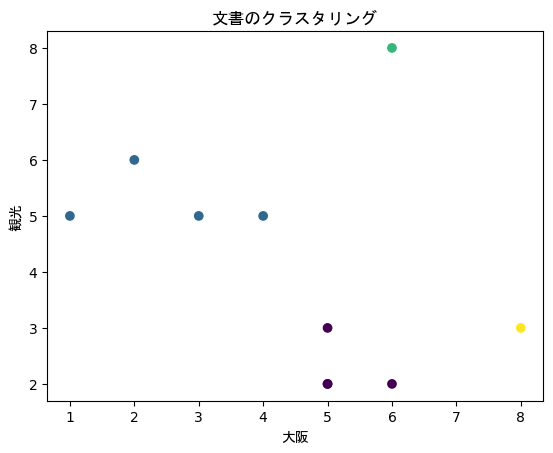

In [1]:
### リスト1 ###

# k-means クラスタリング #

# matplotlibの日本語化対応をするために、次の pip install を行なう必要がある。
# pip install japanize-matplotlib

from matplotlib.font_manager import FontProperties

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# 文書データ[大阪, 観光]（各単語の頻度を仮定）
X = [[5, 3], [2, 6], [5, 2], [4, 5], [3, 5], [6, 2], [1, 5], [6, 8], [5, 2], [8, 3]]


# クラスタリングモデルの構築
kmeans = KMeans(n_clusters = 4) # クラスタ数を設定
kmeans.fit(X)

# クラスタリング結果の可視化
plt.scatter(*zip(*X), c=kmeans.labels_, cmap='viridis')
plt.xlabel('大阪', fontname = 'MS Gothic')
plt.ylabel('観光', fontname = 'MS Gothic')

plt.title('文書のクラスタリング', fontname ='MS Gothic')
plt.show()

### 教師あり学習（Logistic Regression, ロジスティック回帰モデル）

In [2]:
### リスト2 ###

### Logistic Regression （ロジスティック回帰）を用いた分類 ###

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 文書データ[大阪, 京都, 観光]（各単語の頻度を仮定）
X = [[4, 0, 2], [0, 3, 4], [0, 5, 3], [1, 4, 2], [5, 1, 3], [2, 3, 5], [2, 1, 0], [1, 3, 0], [1, 0, 3], [2, 7, 0]]

# 各文書データのクラス（ラベル） => 大阪の観光の文書: 0, 京都の観光の文書: 1, そうでない文書: 2
# （こうしたクラスを人手で与えることで分類器（学習モデル）を構築するので、「教師あり学習」という。）
y = [0, 1, 1, 1, 0, 1, 2, 2, 0, 2]


# データの分割
# test_size を変えると、Accyracy の値が変動する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# 分類器（学習モデル）の構築と学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 構築した分類器（学習モデル）の評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5


### 参考: sigmoid関数（シグモイド関数）

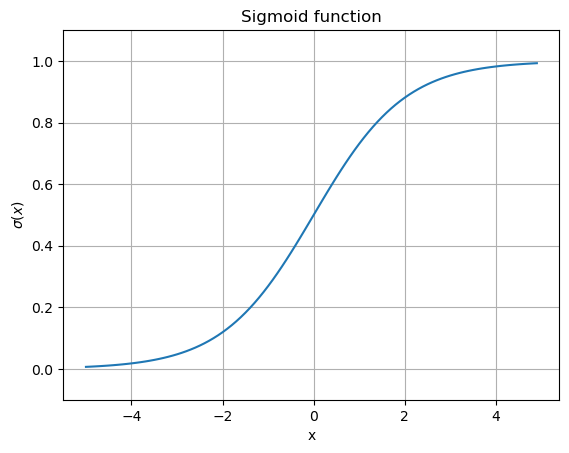

In [3]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1) #x=-5.0から5.0まで、0.1刻みでNumpy配列を生成する ([-5.0, -4.9, ..., 4.9])
y = sigmoid(x) #上記で定義した関数を呼び出す
plt.ylim(-0.1, 1.1) #y軸の範囲を指定
plt.plot(x, y)


plt.grid(True)
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("$\sigma(x)$")
plt.show()